<a href="https://colab.research.google.com/github/LeenaGannu/Malaria-Detection-Using-DL/blob/main/MalariaDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/Train'
valid_path = '/content/drive/MyDrive/Dataset/Test'

In [ ]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:

# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/Dataset/Train/Uninfected',
 '/content/drive/MyDrive/Dataset/Train/Parasite']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[early_stop],verbose=True
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
13/13 [==============================] - 360s 27s/step - loss: 1.3983 - accuracy: 0.5048 - val_loss: 0.9371 - val_accuracy: 0.4478
Epoch 2/4
13/13 [==============================] - 342s 27s/step - loss: 0.6627 - accuracy: 0.6322 - val_loss: 0.5446 - val_accuracy: 0.7313
Epoch 3/4
13/13 [==============================] - 341s 27s/step - loss: 0.5442 - accuracy: 0.7236 - val_loss: 0.8396 - val_accuracy: 0.5896
Epoch 4/4
13/13 [==============================] - 341s 27s/step - loss: 0.4504 - accuracy: 0.7909 - val_loss: 0.4327 - val_accuracy: 0.7164


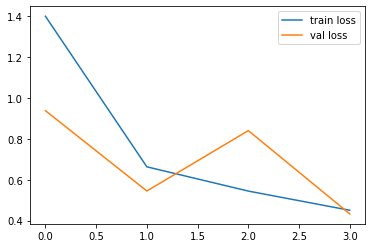

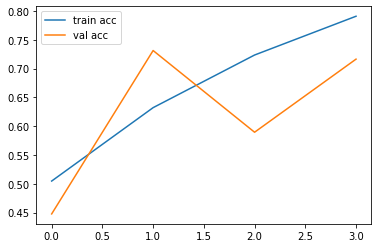

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[0.7395537 , 0.26044634],
       [0.23922461, 0.7607753 ],
       [0.91565317, 0.08434685],
       [0.8738484 , 0.12615165],
       [0.44199833, 0.55800164],
       [0.59732443, 0.40267554],
       [0.16574576, 0.8342542 ],
       [0.32770717, 0.67229277],
       [0.6980551 , 0.30194497],
       [0.8194302 , 0.18056987],
       [0.54775983, 0.4522402 ],
       [0.22170202, 0.778298  ],
       [0.339607  , 0.660393  ],
       [0.7366009 , 0.26339912],
       [0.3394392 , 0.6605608 ],
       [0.40020496, 0.599795  ],
       [0.7947404 , 0.2052596 ],
       [0.38214302, 0.617857  ],
       [0.94979095, 0.050209  ],
       [0.38534564, 0.61465436],
       [0.9546638 , 0.04533624],
       [0.4387846 , 0.5612154 ],
       [0.7912211 , 0.20877895],
       [0.6662887 , 0.33371127],
       [0.51190704, 0.48809302],
       [0.6408779 , 0.3591221 ],
       [0.3562209 , 0.6437791 ],
       [0.29008046, 0.7099195 ],
       [0.6056747 , 0.39432526],
       [0.2206561 , 0.77934396],
       [0.

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [ ]:

x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255


In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.00397536, 0.9960246 ]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
